# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [47]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [48]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.910000e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [49]:
#  1. Get the total rides for each city type
total_rides_type = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [50]:
# 2. Get the total drivers for each city type
total_drivers_type = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [51]:
#  3. Get the total amount of fares for each city type
total_fares_type = pyber_data_df.groupby(['type']).sum()['fare']
total_fares_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [52]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride = total_fares_type / total_rides_type
average_fare_per_ride


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [53]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver = total_fares_type / total_drivers_type
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [54]:
#  6. Create a PyBer summary DataFrame. 
summary_1 = {'Total Rides': total_rides_type,
                    'Total Drivers': total_drivers_type,
                    'Total Fares': total_fares_type,
                    'Average Fare per Ride': average_fare_per_ride,
                    'Average Fare per Driver': average_fare_per_driver}
pyber_summary_df = pd.DataFrame(summary_1)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [55]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [56]:
#  8. Format the columns.
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map('${:,.2f}'.format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [57]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06,34.58,3.910000e+12,46,Urban


In [72]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_by_city_date_df = pyber_data_df.groupby(['type','date']).sum().fare.to_frame()
fare_by_city_date_df.head

<bound method NDFrame.head of                     fare
type  date              
Rural 2019-01-01   43.69
      2019-01-02   52.12
      2019-01-03   19.90
      2019-01-04   24.88
      2019-01-06   47.33
...                  ...
Urban 2019-05-04  323.57
      2019-05-05  322.10
      2019-05-06  181.20
      2019-05-07  258.01
      2019-05-08  170.82

[334 rows x 1 columns]>

In [59]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fare_by_city_date_df = fare_by_city_date_df.reset_index()
fare_by_city_date_df.head()

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33


In [60]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fare_by_city_date_df = fare_by_city_date_df.pivot(index='date',columns='type', values='fare')
fare_by_city_date_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [61]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

fare_dates_df = fare_by_city_date_df.loc['2019-01-01':'2019-04-29']
fare_dates_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [73]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
type(fare_dates_df.index)

fare_dates_df.index = pd.to_datetime(fare_dates_df.index)
fare_dates_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


In [63]:
# 7. Check that the datatype for the index is datetime using df.info()
fare_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [66]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fare_dates_df = fare_dates_df.resample('W').sum()
fare_dates_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


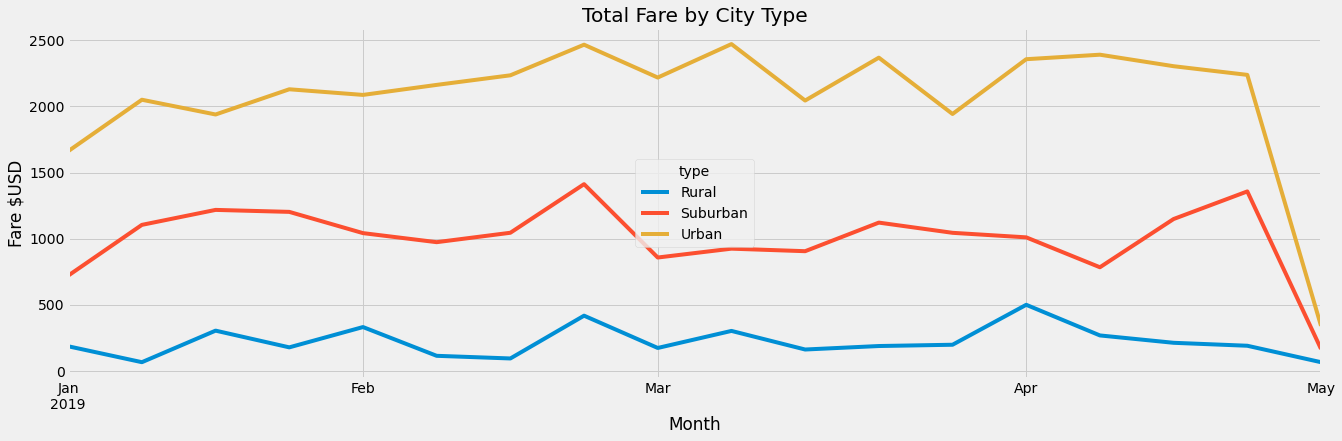

In [69]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = fare_dates_df.plot(figsize=(20,6))
#Add a title
ax.set_title("Total Fare by City Type")
# Add a x- and y-axis label
ax.set_xlabel("Month")
ax.set_ylabel("Fare $USD")
plt.savefig("Challenge_fare_summary.png")
plt.show()